In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
x = data.drop('Salary', axis=1)
y = data['Salary']

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
test_x = np.array([7.5, 8.9, 10, 15])
predictions = model.predict(test_x.reshape(-1, 1))
for a, b in zip(test_x, predictions):
    print(a, b)

7.5 96666.91760958177
8.9 109896.86485961887
10.0 120291.82341321945
15.0 167541.6350204948


In [7]:
print(model.coef_[0], model.intercept_)

9449.962321455074 25792.20019866871


## 评估模型

In [8]:
import sklearn.utils as su
data_x, data_y = su.shuffle(x, y, random_state=7)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=5 / 30)

In [11]:
model.fit(x_train, y_train)
pred_y = model.predict(x_test)
pred_y

array([115836.01672808,  52564.89906781,  67903.35183393,  35309.13970591,
        53523.55236569])

In [12]:
import sklearn.metrics as sm

In [13]:
sm.mean_absolute_error(y_test, pred_y)

4532.548793288899

In [14]:
sm.mean_squared_error(y_test, pred_y)

24844856.732828785

In [15]:
sm.median_absolute_error(y_test, pred_y)

4077.1009321935126

In [16]:
sm.r2_score(y_test, pred_y)

0.9639989963815359

## 模型保存

In [17]:
import pickle
with open('SalaryPredictionModel.pkl', 'wb') as f:
    pickle.dump(model, f)

In [18]:
model.intercept_

24763.953429202098

In [19]:
model.coef_

array([9586.53297883])

In [20]:
trend = model.coef_[0] * data['YearsExperience'] + model.intercept_

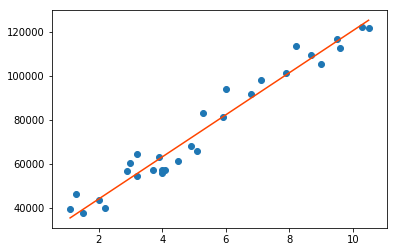

In [23]:
plt.plot(data['YearsExperience'], trend, color='orangered')
plt.scatter(data['YearsExperience'], data['Salary'])